### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from matplotlib import style

In [5]:
style.use('ggplot')

### Importing the data

In [6]:
sales = pd.read_csv("SalesData.csv")

In [6]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [29]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)

sales1 = sales.groupby(['Region'])[['Sales2015','Sales2016']].sum().round(0)
sales1

,Sales2015,Sales2016
Region,,
Central,7891729.0,9787809.0
East,9512916.0,12667230.0
West,5349745.0,7209689.0


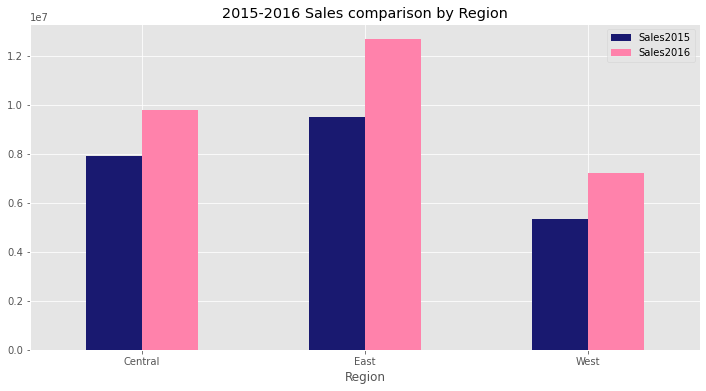

In [30]:
sales1graph=sales1.plot.bar(figsize=(12,6),color = ['#191970','#ff82ab'])
plt.title('2015-2016 Sales comparison by Region')
plt.xticks(rotation=0)
plt.show()

----------------------------------------

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [9]:
sales2 = sales.groupby(['Region'])['Sales2016'].sum()

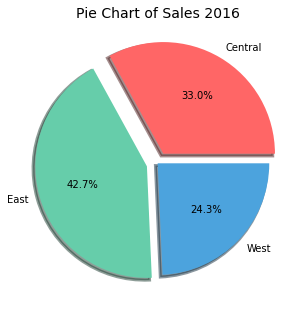

In [11]:
plt.figure(figsize=(5,8))

sales2.plot(kind='pie', explode = (0.1,0.1,0), colors=['#ff6666','#66cdaa','#4ca3dd'], autopct= '%1.1f%%', fontsize=10, 
            wedgeprops = {'linewidth': 3}, textprops = {'fontsize': 18}, shadow = True, subplots=True)
plt.ylabel('')

plt.title('Pie Chart of Sales 2016', fontsize=14, fontweight = 14)
plt.show()

----------------------------------------

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [ ]:
sales3 = sales.groupby([]).aggregate({})

sales3graph=sales3.plot.bar(figsize=(18,6))

In [11]:
sales3 = sales.groupby(['Region', 'Tier'])[['Sales2015','Sales2016']].sum().round()

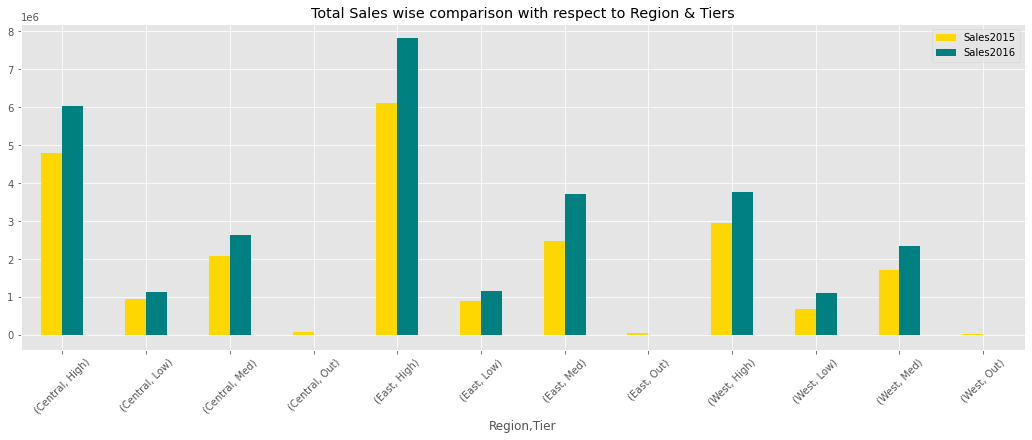

In [12]:
sales3.plot(kind='bar',color = ['#ffd700','#008080'],figsize=(18,6))
plt.title('Total Sales wise comparison with respect to Region & Tiers')
plt.xticks(rotation=45)
plt.show()

----------------------------------------

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [13]:
east = sales[sales.Region == 'East'].reset_index(drop=True)

In [14]:
res1 = east.groupby(['State'])[['Sales2015','Sales2016']].sum()

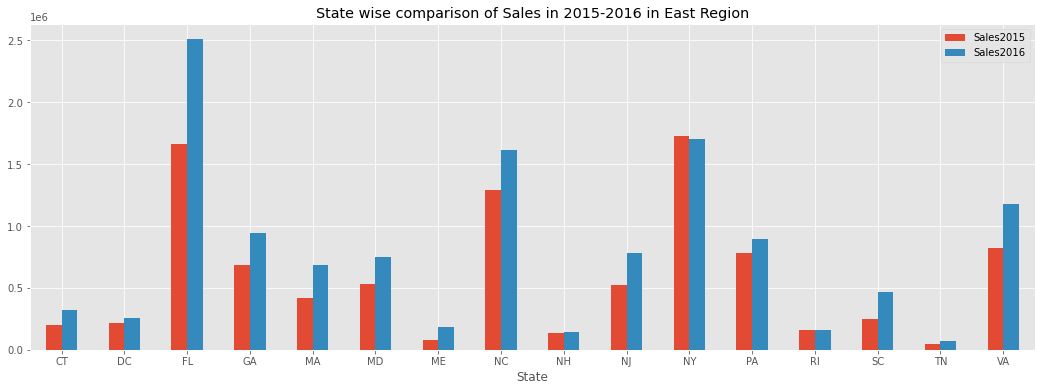

In [15]:
res1.plot.bar(figsize=(18,6))
plt.title('State wise comparison of Sales in 2015-2016 in East Region')
plt.xticks(rotation=0)
plt.show()

In East region, NY state registered decline in Sales in 2016 as compared to 2015 Sales.

----------------------------------------

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [16]:
high_tier = sales[sales.Tier == 'High']

In [17]:
res2= high_tier.groupby('Division')[['Units2015','Units2016']].sum()

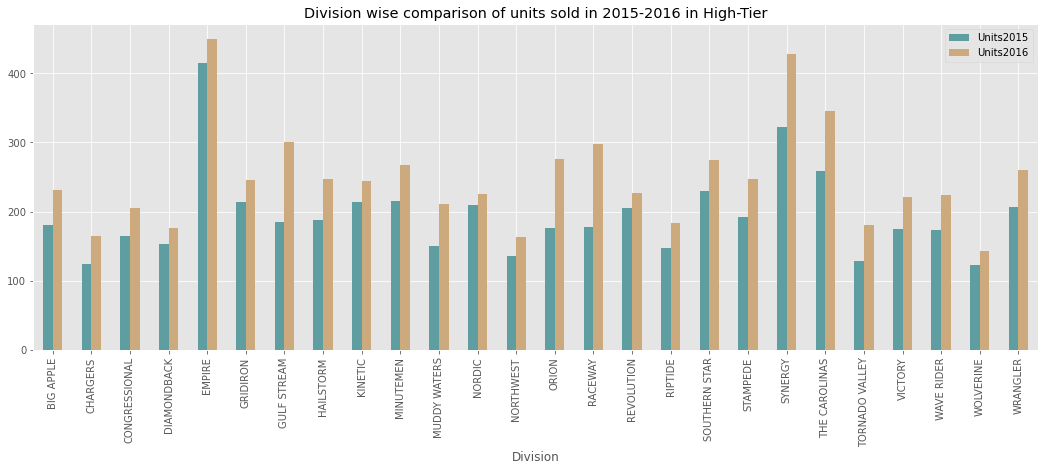

In [18]:
res2.plot.bar(figsize=(18,6), color=['#5f9ea0','#cdaa7d'])
plt.title('Division wise comparison of units sold in 2015-2016 in High-Tier')
plt.show()

In High Tier, none of the divsions saw decline in number of Units sold in 2016 as compared to Units Sold in 2015.

----------------------------------------

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [9]:
sales['Qtr'] = np.where(((sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar')), 'Q1', 
                        np.where(((sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun')), 'Q2', 
                                 np.where(((sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep')), 'Q3', 'Q4')))

In [10]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


----------------------------------------

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [12]:
sales4 = sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()

In [13]:
sales4

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


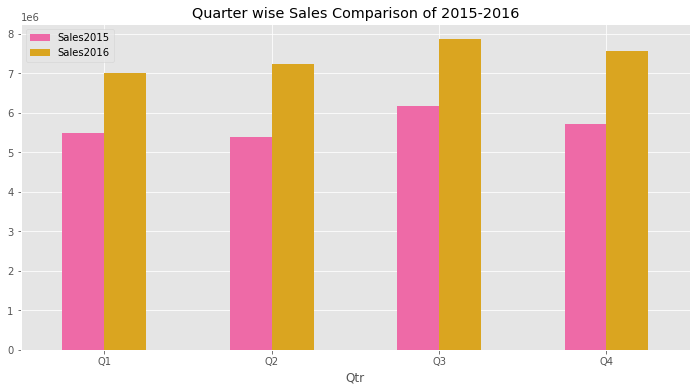

In [16]:
sales4.plot.bar(figsize=(12,6), color=['#ee6aa7','#daa520'])
plt.title('Quarter wise Sales Comparison of 2015-2016')
plt.xticks(rotation=0)
plt.show()

----------------------------------------

### 8. Determine the composition of Qtr wise sales in 2016 with regards to all the Tiers in a pie chart.

In [12]:
sales8 = sales[sales.Tier !='Out']

In [13]:
res3= sales8.pivot_table(index=['Qtr'],columns = ['Tier'], values=['Sales2016'], aggfunc=np.sum).round(0)
res3

Sales2016                     
Tier       High       Low        Med
Qtr                                 
Q1    3867719.0  948833.0  2181402.0
Q2    4130953.0  890595.0  2215814.0
Q3    4872559.0  795178.0  2197058.0
Q4    4740002.0  742659.0  2085207.0

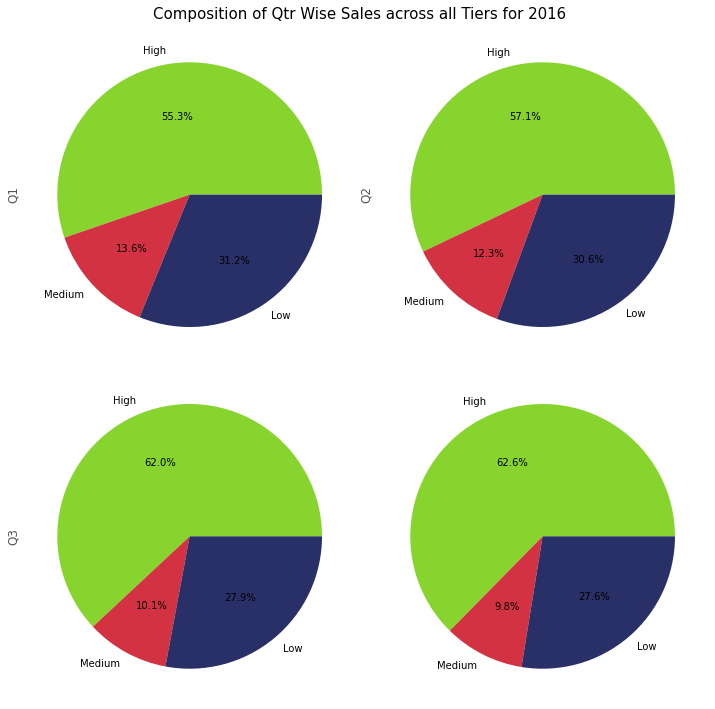

In [24]:
fig, ax = plt.subplots(2,2, figsize=[10,10])
fig.suptitle('Composition of Qtr Wise Sales across all Tiers for 2016', size=15)


# Qtr1                                            
res3.loc["Q1",:].plot(kind='pie', autopct='%1.01f%%',colors=[ '#87d42f','#d33243','#292f67'], fontsize=10,
           textprops = {'fontsize': 18}, labels=['High','Medium','Low'],ax = ax[0][0])
plt.ylabel('')


# Qtr2                                        
res3.loc["Q2",:].plot(kind='pie', autopct='%1.01f%%',colors=[ '#87d42f','#d33243','#292f67'], fontsize=10,
                      textprops = {'fontsize': 18} , labels=['High','Medium','Low'],ax = ax[0][1])
plt.ylabel('')


# Qtr3                                             
res3.loc["Q3",:].plot(kind='pie', autopct='%1.01f%%',colors=[ '#87d42f','#d33243','#292f67'], fontsize=10,
            textprops = {'fontsize': 18}, labels=['High','Medium','Low'],ax = ax[1][0])
plt.ylabel('')


# Qtr4                                                
res3.loc["Q4",:].plot(kind='pie', autopct='%1.01f%%',colors=[ '#87d42f','#d33243','#292f67'], fontsize=10,
           textprops = {'fontsize': 18}, labels=['High','Medium','Low'],ax = ax[1][1])
plt.ylabel('')

plt.tight_layout()
plt.show()

--------------------------------------------------------------